## Final Project Submission

Please fill out:
* Student name: <b>Carly McMullen</b>
* Student pace: <b>Self paced</b>
* Scheduled project review date/time: <b>07 APR 2020/1000</b>
* Instructor name: <b>Jeff</b>
* Blog post URL:


<h5> First, import all programs I may need.</h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

<h5> Next, previewing all the data given in the repo

In [2]:
rt_info=pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
print(len(rt_info))
rt_info.head()

1560


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [3]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding = "ISO-8859-1")
print(len(rt_reviews))
rt_reviews.head()


54432


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(len(bom_movies))
bom_movies.head()

3387


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
imdb_names = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
print(len(imdb_names))
imdb_names.head()

606648


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [6]:
imbd_titles = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
print(len(imbd_titles))
imbd_titles.head()

331703


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
print(len(imdb_crew))
imdb_crew.head()

146144


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
print(len(imdb_basics))
imdb_basics.head()

146144


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
print(len(imdb_principals))
imdb_principals.head()

1028186


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
print(len(imdb_ratings))
imdb_ratings.head()

73856


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
imdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
print(len(imdb_movies))
imdb_movies.head()

26517


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
print(len(tn_movie_budgets))
tn_movie_budgets.head()

5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<h6> Given the data above, what questions are both salient to the task and deliverable?</h6>
<ol>
    <li>What are the 100 films which had the highest profit margin?</li>
    <li>Of those films, what was the average production budget?</li>
    <li>Of those films, what time of the year were they released?</li>
    <li>Of those films, what genre were they?</li>
    <li>Of those films, what was the average run time?</li>
</ol>

In [13]:
# Answering the first question. 
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [14]:
#convert columns to ints so they can be manipulated 
tn_movie_budgets['worldwide_gross']=tn_movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)
tn_movie_budgets['production_budget']=tn_movie_budgets['production_budget'].str.replace('$','').str.replace(',','').astype(int)

In [15]:
#Create a column for profit and order values by that. 
tn_movie_budgets['Profit']=tn_movie_budgets['worldwide_gross']-tn_movie_budgets['production_budget']
tn_movie_budgets['Profit']=tn_movie_budgets['Profit'].astype(int)
tn_movie_budgets=tn_movie_budgets.sort_values(by='Profit', ascending = False)
#Creat a new df called top_100 w/ just the info I want to use.
top_100=tn_movie_budgets.head(100)
top_100=top_100.set_index('movie').drop(['domestic_gross','id'], axis=1)
top_100.head()

,release_date,production_budget,worldwide_gross,Profit
movie,,,,
Avatar,"Dec 18, 2009",425000000,2776345279,2351345279
Titanic,"Dec 19, 1997",200000000,2208208395,2008208395
Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220
Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864


<h6>Now the top 100 films have been established. Further analysis follows.

In [16]:
#Find the average production budget and profit.
print('The mean profit is:',top_100['Profit'].mean())
print('The mean production budget is:', top_100['production_budget'].mean())
print('The mean worldwide gross is:', top_100['worldwide_gross'].mean())
print('The lowest production budget to make the Top 100 films is:',top_100['production_budget'].min())
r = pearsonr(top_100['Profit'],top_100['production_budget'])
R_profit_budget=(r[0])
print('The r value between profit and production budget is:', R_profit_budget)

The mean profit is: 850396016.54
The mean production budget is: 159522000.0
The mean worldwide gross is: 1009918016.54
The lowest production budget to make the Top 100 films is: 10500000
The r value between profit and production budget is: 0.3797822303349262


R: 0.3797822303349262


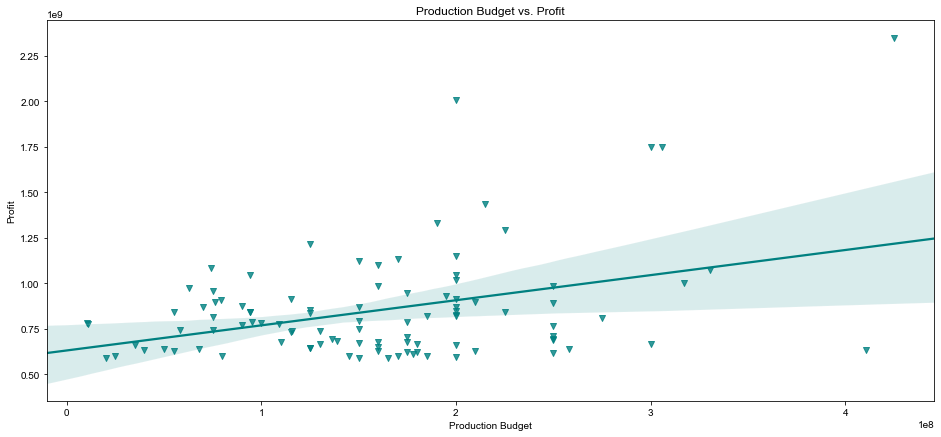

In [17]:
#Graphical representation of the relationship between Production Biudget and profitability 
Budget_Profit=plt.figure(figsize=(35,7))
ax=Budget_Profit.add_subplot(121)
sns.set_style('darkgrid')
sns.set_context('notebook')
Profits = sns.regplot(x='production_budget', y='Profit', data=top_100, marker='v', color='teal', ax=ax).set(xlabel='Production Budget',
                                            ylabel='Profit', title='Production Budget vs. Profit')
print("R:", R_profit_budget)


In [18]:
type(top_100['release_date'])
top_100.head()
top_100['release_date'][1]    
Release_Month =[]
for x in range(0,100):
    Release_Month.append(top_100['release_date'][x][0:3])
Release_Month
top_100['Release_Month']=Release_Month
top_100.head()

,release_date,production_budget,worldwide_gross,Profit,Release_Month
movie,,,,,
Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec
Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec
Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec
Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun


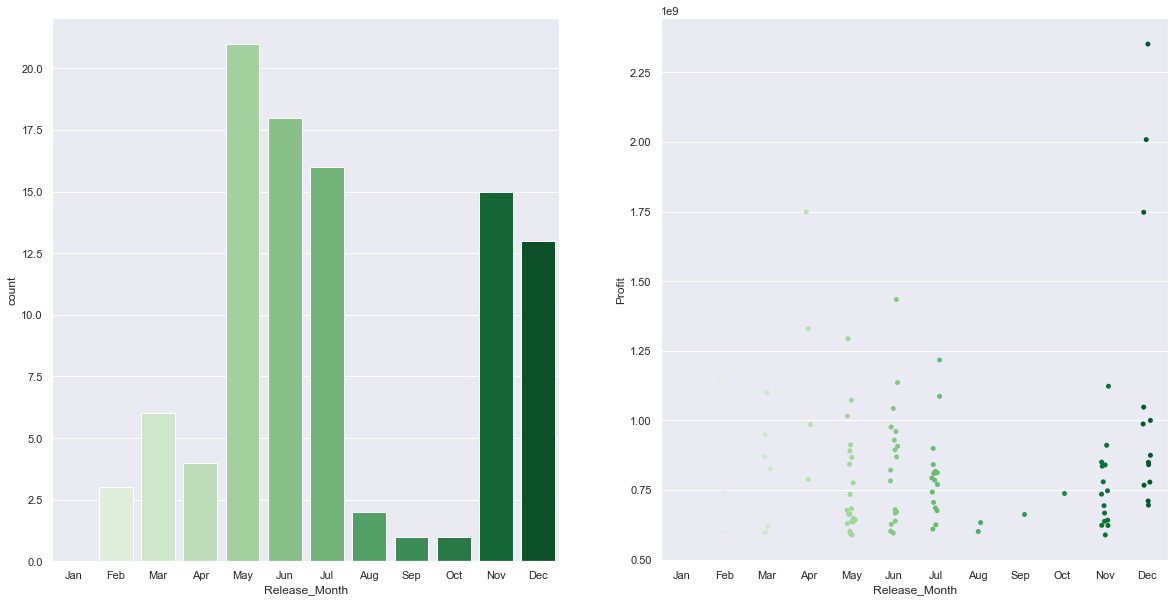

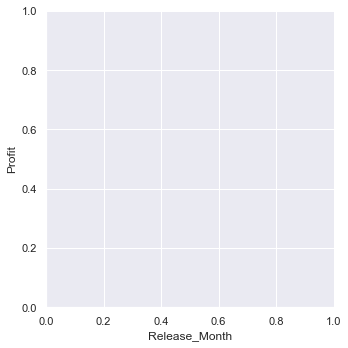

In [19]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


sns.set_context('notebook')
Release_Data = plt.figure(figsize=(20,10))

ax = Release_Data.add_subplot(121)
ax2 = Release_Data.add_subplot(122)
Color=sns.color_palette('Greens', n_colors=12)

sns.countplot(top_100['Release_Month'], order=Months, ax=ax, palette=Color)
sns.catplot(x='Release_Month', y='Profit', data=top_100, order=Months, ax=ax2, palette=Color)

In [20]:
#Merge my top 100 Dataframe with another to get runtimes and genres
imdb_basics=imdb_basics.rename(columns={'primary_title':'movie'})
imdb_basics.head()
top_100_final=pd.merge(top_100,imdb_basics[['movie', 'runtime_minutes','genres']], on='movie', how='left')
print(len(top_100_final))
top_100_final

122


,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.0,Horror
1,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,NaN,Adventure
2,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.0,Family
3,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.0,"Action,Adventure,Sci-Fi"
4,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,NaN,NaN
...,...,...,...,...,...,...,...,...
117,Shrek Forever After,"May 21, 2010",165000000,756244673,591244673,May,93.0,"Adventure,Animation,Comedy"
118,The Matrix Reloaded,"May 15, 2003",150000000,738576929,588576929,May,NaN,NaN
119,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,112.0,"Drama,Fantasy,Romance"
120,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,129.0,"Family,Fantasy,Musical"


In [21]:
#I've noticed that there are 22 duplicates, let's fix that. 
top_100_final[top_100_final['movie'].duplicated(keep=False)].sort_values('movie')

,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
47,Alice in Wonderland,"Mar 5, 2010",200000000,1025491110,825491110,Mar,48.0,Documentary
48,Alice in Wonderland,"Mar 5, 2010",200000000,1025491110,825491110,Mar,99.0,"Fantasy,Musical"
46,Alice in Wonderland,"Mar 5, 2010",200000000,1025491110,825491110,Mar,108.0,"Adventure,Family,Fantasy"
120,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,129.0,"Family,Fantasy,Musical"
16,Beauty and the Beast,"Mar 17, 2017",160000000,1259199706,1099199706,Mar,60.0,"Family,Fantasy,Musical"
15,Beauty and the Beast,"Mar 17, 2017",160000000,1259199706,1099199706,Mar,129.0,"Family,Fantasy,Musical"
121,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,60.0,"Family,Fantasy,Musical"
119,Beauty and the Beast,"Nov 13, 1991",20000000,608431132,588431132,Nov,112.0,"Drama,Fantasy,Romance"
14,Beauty and the Beast,"Mar 17, 2017",160000000,1259199706,1099199706,Mar,112.0,"Drama,Fantasy,Romance"
107,Coco,"Nov 22, 2017",175000000,798008101,623008101,Nov,98.0,Horror


In [22]:
#Dropping the duplicated rows which make the most sense
top_100_final=top_100_final.drop([47,48,120,121,16,14,107,105,12,11,8,82,83,76,77,78,79,54,1,67,87,88], axis=0)

In [23]:
#New list
print(len(top_100_final))
top_100_final.reset_index()
top_100_final.head()

100


,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.0,Horror
2,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.0,Family
3,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.0,"Action,Adventure,Sci-Fi"
4,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,NaN,NaN
5,Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun,124.0,"Action,Adventure,Sci-Fi"


In [24]:
#Is there missing info in the new list?
top_100_final.isna().any()
#Yes. 
print(len(top_100_final[top_100_final['runtime_minutes'].isna()]))
print(len(top_100_final[top_100_final['genres'].isna()]))
#Looks like just under half of the entries are missing runtime and genre info
#Something to pursue in the future. 

41
40


In [52]:
top_100_final=top_100_final.reset_index()
top_100_final.head()

,level_0,index,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,0,0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.000000,Horror
1,1,2,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.000000,Family
2,2,3,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.000000,"Action,Adventure,Sci-Fi"
3,3,4,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,124.186441,NaN
4,4,5,Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun,124.000000,"Action,Adventure,Sci-Fi"


In [53]:
top_100_final.drop(columns=['level_0','index'])

,movie,release_date,production_budget,worldwide_gross,Profit,Release_Month,runtime_minutes,genres
0,Avatar,"Dec 18, 2009",425000000,2776345279,2351345279,Dec,93.000000,Horror
1,Titanic,"Dec 19, 1997",200000000,2208208395,2008208395,Dec,115.000000,Family
2,Avengers: Infinity War,"Apr 27, 2018",300000000,2048134200,1748134200,Apr,149.000000,"Action,Adventure,Sci-Fi"
3,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000,2053311220,1747311220,Dec,124.186441,NaN
4,Jurassic World,"Jun 12, 2015",215000000,1648854864,1433854864,Jun,124.000000,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
95,The Passion of the Christ,"Feb 25, 2004",25000000,622341924,597341924,Feb,124.186441,NaN
96,Spider-Man 2,"Jun 30, 2004",200000000,795110670,595110670,Jun,124.186441,NaN
97,Shrek Forever After,"May 21, 2010",165000000,756244673,591244673,May,93.000000,"Adventure,Animation,Comedy"
98,The Matrix Reloaded,"May 15, 2003",150000000,738576929,588576929,May,124.186441,NaN


In [63]:
type(top_100_final['genres'][0])

str

In [62]:
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Horror','Sci-Fi'))

AttributeError: 'float' object has no attribute 'replace'

In [59]:
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Horror','Sci-Fi'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Family','Romance'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Sci-Fi','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('NaN','No Data'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Crime,Thriller','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Animation,Comedy', 'Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Family,Fantasy,Musical','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Animation','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Fantasy','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Crime,Thriller','Thriller'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Thriller','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Animation,Drama','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Animation,Comedy','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Comedy','Comedy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Biography,Drama,Music','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Animation,Comedy','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Thriller','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Animation','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Drama,Family','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Family,Fantasy','Fantasy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Comedy','Comedy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Animation','Animated/Family'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Sci-Fi,Thriller','Thriller'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Sci-Fi','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Fantasy','Fantasy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Horror,Thriller','Horror'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Drama,Fantasy','Drama'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Action,Adventure,Fantasy','Action'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Adventure,Family,Fantasy','Fantasy'))
top_100_final['genres']=top_100_final['genres'].map(lambda x: x.replace('Drama,Fantasy,Romance','Animated/Family'))

AttributeError: 'float' object has no attribute 'replace'

In [26]:
#Manipulate genre info
top_100_final['genres'].value_counts(dropna=False)

NaN                              40
Action,Adventure,Sci-Fi          17
Adventure,Animation,Comedy       13
Action,Adventure,Comedy           5
Action,Adventure,Fantasy          4
Adventure,Family,Fantasy          3
Adventure,Fantasy                 2
Action,Crime,Thriller             2
Adventure,Animation,Drama         1
Biography,Documentary,History     1
Horror                            1
Biography,Drama,Music             1
Drama,Fantasy,Romance             1
Action,Adventure,Animation        1
Action,Thriller                   1
Action,Adventure,Thriller         1
Adventure,Drama,Fantasy           1
Horror,Thriller                   1
Family,Fantasy,Musical            1
Family                            1
Adventure,Drama,Family            1
Action,Sci-Fi,Thriller            1
Name: genres, dtype: int64

In [27]:
#Deal with missing runtimes
top_100_final['runtime_minutes']=top_100_final['runtime_minutes'].fillna(value=top_100_final['runtime_minutes'].mean())
top_100_final.isna().sum()

index                 0
movie                 0
release_date          0
production_budget     0
worldwide_gross       0
Profit                0
Release_Month         0
runtime_minutes       0
genres               40
dtype: int64

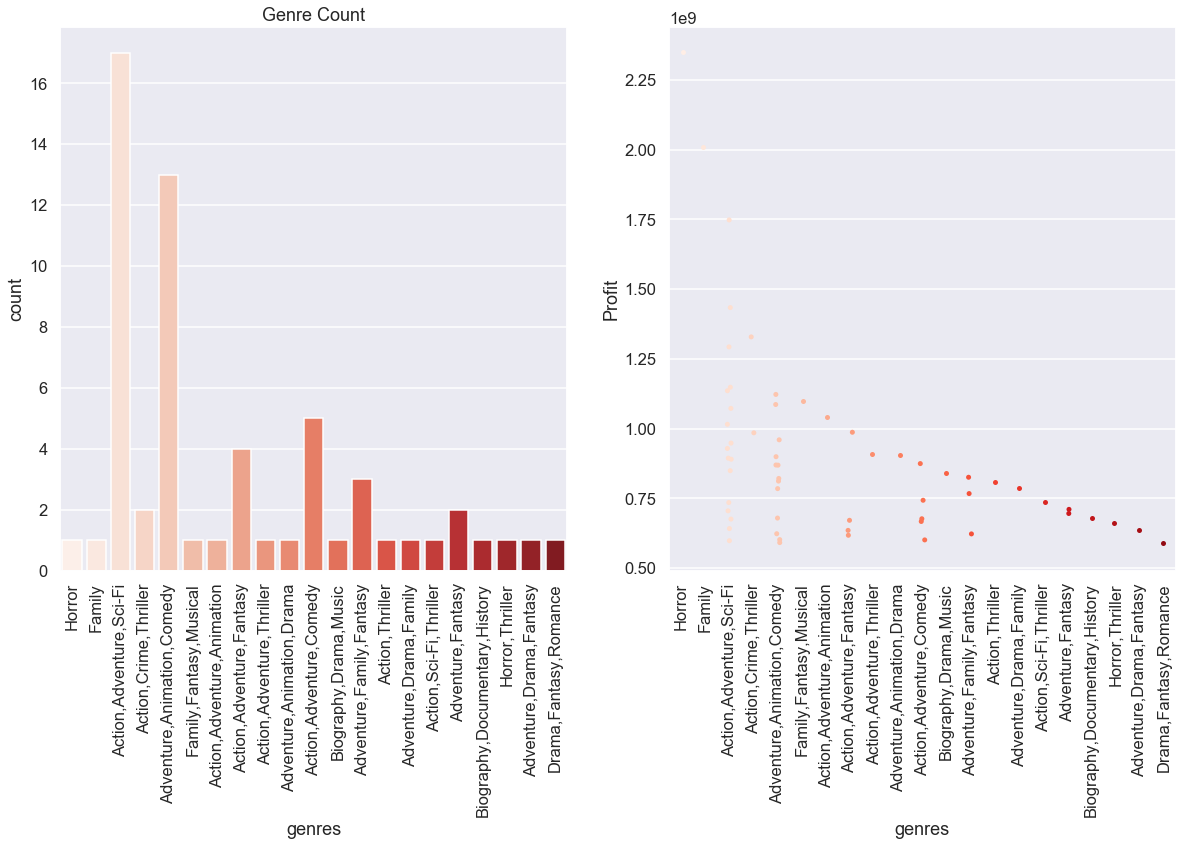

In [28]:
#Despite the missing info, I'll still analyze the genre and runtime info.
genre_data=plt.figure(figsize=(20,10))
sns.set_context('talk')
ax=genre_data.add_subplot(121)
ax2=genre_data.add_subplot(122)
Colors = sns.color_palette('Reds', n_colors=22)
Chart=sns.countplot(top_100_final['genres'], ax=ax, palette=Colors).set(title='Genre Count')
sns.stripplot(x='genres', y='Profit', data=top_100_final, ax=ax2, palette=Colors)
#ax.set_xticklabels(labels=Chart.get_xticklabels(),rotation=90);
#ax2.set_xticklabels(labels=top_100_final['genres'], rotation=90);
ax.get_xticklabels()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90);

The r value between profit and runtime is: -0.03309665962297187
The average runtime is: 124.18644067796609


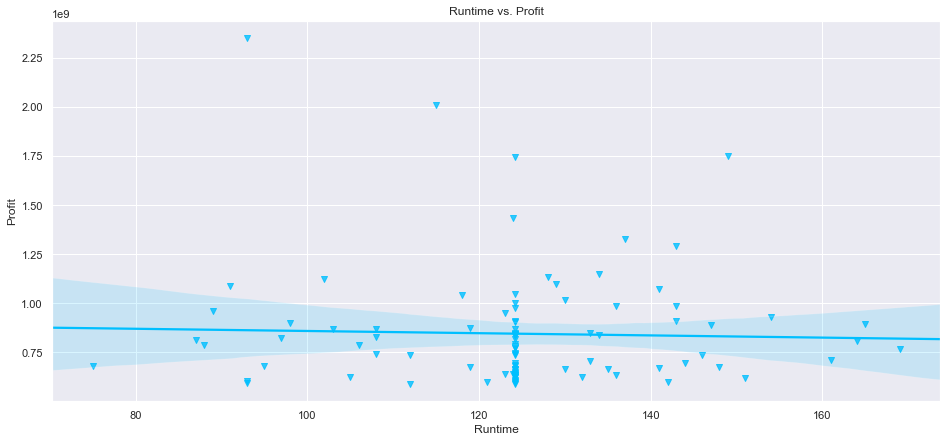

In [29]:
#Finding the relationship between runtime and profit. 
Runtime_Profit=plt.figure(figsize=(35,7))
sns.set_style('darkgrid')
sns.set_context('notebook')
ax = Runtime_Profit.add_subplot(121)
sns.regplot(x='runtime_minutes', y='Profit', data=top_100_final, marker='v', color='deepskyblue', ax=ax).set(xlabel='Runtime',
                                            ylabel='Profit', title='Runtime vs. Profit')
r2 = pearsonr(top_100_final['Profit'],top_100_final['runtime_minutes'])
R_profit_runtime=(r2[0])
print('The r value between profit and runtime is:', R_profit_runtime)
print('The average runtime is:', top_100_final['runtime_minutes'].mean())

In [30]:
Netflix = requests.get('https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix','lxml')
Netflix_Soup = BeautifulSoup(Netflix.content, 'html.parser')

In [31]:
print(Netflix_Soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of original films distributed by Netflix - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XpY2JQpAEKIAAVBU28gAAAAS","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_original_films_distributed_by_Netflix","wgTitle":"List of original films distributed by Netflix","wgCurRevisionId":950975524,"wgRevisionId":950975524,"wgArticleId":56312051,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Spanish-language sources (es)","CS1 Portuguese-l

In [32]:
Titles=Netflix_Soup.findAll('i')
Titles[2].text

'Crouching Tiger, Hidden Dragon: Sword of Destiny'

In [33]:
Movie_Titles = [i.text for i in Netflix_Soup.findAll('i')]
Movie_Titles[:5]
print(Movie_Titles)

['Beasts of No Nation', 'The Ridiculous 6', 'Crouching Tiger, Hidden Dragon: Sword of Destiny', "Pee-wee's Big Holiday", 'Special Correspondents', 'The Do-Over', 'The Fundamentals of Caring', 'Brahman Naman', 'Rebirth', 'Tallulah', 'XOXO', 'ARQ', 'The Siege of Jadotville', 'Mascots', 'I Am the Pretty Thing That Lives in the House', '7 años', 'True Memoirs of an International Assassin', 'Mercy', 'Spectral', 'Barry', 'Coin Heist', 'Clinical', 'Take the 10', 'iBoy', 'Imperial Dreams', "Girlfriend's Day", "I Don't Feel at Home in This World Anymore", 'Burning Sands', 'Deidra & Laney Rob a Train', 'The Most Hated Woman in America', 'The Discovery', 'Win It All', 'Sandy Wexler', 'Sand Castle', 'Tramps', 'Small Crimes', 'Handsome: A Netflix Mystery Movie', 'Blame!', 'War Machine', 'Shimmer Lake', 'Okja', 'To the Bone', 'The Incredible Jessica James', 'Naked', 'Death Note', 'Little Evil', '#REALITYHIGH', 'First They Killed My Father', "Gerald's Game", 'Our Souls at Night', 'Bomb Scared ', 'The

In [34]:
Feature_Title = []
for movie in Movie_Titles:
    Feature_Title.append(movie)
    if movie == 'The App':
        break
     
        
print(len(Feature_Title))

203


In [35]:
Documentaries = Netflix_Soup.find('table', id='documentaryfeaturefilms')
Documentaries.find('i').text

'Art of Conflict: The Murals of Northern Ireland'

In [36]:
Documentary_Titles = [i.text for i in Documentaries.findAll('i')]
print(len(Documentary_Titles))
Documentary_Titles

121


['Art of Conflict: The Murals of Northern Ireland',
 'The Short Game',
 'The Square',
 'Mitt',
 'The Battered Bastards of Baseball',
 'Mission Blue',
 'Print the Legend',
 'E-Team',
 'Virunga',
 'My Own Man',
 'The Other One: The Long Strange Trip of Bob Weir',
 'Hot Girls Wanted',
 'What Happened, Miss Simone?',
 'Tig',
 'Keith Richards: Under the Influence',
 "Winter on Fire: Ukraine's Fight for Freedom",
 'My Beautiful Broken Brain',
 'Team Foxcatcher',
 'Tony Robbins: I Am Not Your Guru',
 "I'll Sleep When I'm Dead",
 'Extremis',
 'The White Helmets',
 'Audrie & Daisy',
 'Amanda Knox',
 '13th',
 'Sky Ladder: The Art of Cai Guo-Qiang',
 'Into the Inferno',
 'The Ivory Game',
 '13th: A Conversation with Oprah Winfrey & Ava DuVernay',
 'Casting JonBenet',
 'The Mars Generation',
 'Get Me Roger Stone',
 'Laerte-se',
 'Joshua: Teenager vs. Superpower',
 'CounterPunch',
 'Nobody Speak: Trials of the Free Press',
 'Chasing Coral',
 'Icarus',
 'Resurface',
 'Heroin(e)',
 'Strong Island',
 

In [37]:
Feature_Title = Feature_Title + Documentary_Titles

In [38]:
Genres = Netflix_Soup.findAll('tr')
Genres[1].select("td")[1].text.replace('\n','')

'War/drama'

In [39]:
Feature_Genre = []
for x in Genres[1:202]:
    Feature_Genre.append(x.select('td')[1].text.replace('\n',''))
Feature_Genre

['War/drama',
 'Western',
 'Action',
 'Adventure',
 'Satire',
 'Action comedy',
 'Comedy-drama',
 'Comedy',
 'Thriller',
 'Comedy-drama',
 'Drama',
 'Science fiction/Thriller',
 'War film',
 'Mockumentary',
 'Horror',
 'Drama',
 'Action comedy',
 'Thriller',
 'Science fiction/Action',
 'Biopic',
 'Heist film',
 'Thriller',
 'Comedy',
 'Science fiction/Thriller',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Biopic',
 'Science fiction/Drama',
 'Comedy',
 'Comedy',
 'War film',
 'Romance',
 'Dark comedy',
 'Comedy',
 'Anime/Science fiction',
 'War-Comedy',
 'Crime thriller',
 'Science fiction/Adventure',
 'Drama',
 'Comedy',
 'Comedy',
 'Horror thriller',
 'Comedy horror',
 'Comedy',
 'Drama',
 'Horror thriller',
 'Romance',
 'Black comedy',
 'Teen comedy horror',
 'Comedy-drama',
 'Horror/crime drama',
 'Action thriller',
 'Western',
 'Romantic comedy',
 'Dark comedy',
 'Romantic drama',
 'Urban fantasy',
 'Comedy-drama',
 'Comedy',
 'Horror thriller',
 'Romantic comedy',
 'Biogr

In [40]:
Movie_Length = Netflix_Soup.findAll('tr')
Movie_Length[2].select("td")[3].text.replace('.\n','')

'1 hour, 59 min'

In [41]:
Feature_Length = []
for x in Movie_Length[1:204]:
    Feature_Length.append(x.select('td')[3].text.replace('\n',''))
print(len(Feature_Length))
Feature_Length

203


['2 hours, 16 min.',
 '1 hour, 59 min.',
 '1 hour, 43 min.',
 '1 hour, 29 min.',
 '1 hour, 40 min.',
 '1 hour, 48 min.',
 '1 hour, 37 min.',
 '1 hour, 35 min.',
 '1 hour, 40 min.',
 '1 hour, 51 min.',
 '1 hour, 32 min.',
 '1 hour, 28 min.',
 '1 hour, 48 min.',
 '1 hour, 35 min.',
 '1 hour, 29 min.',
 '1 hour, 16 min.',
 '1 hour, 38 min.',
 '1 hour, 30 min.',
 '1 hour, 48 min.',
 '1 hour, 44 min.',
 '1 hour, 37 min.',
 '1 hour, 44 min.',
 '1 hour, 20 min.',
 '1 hour, 30 min.',
 '1 hour, 27 min.',
 '1 hour, 10 min.',
 '1 hour, 36 min.',
 '1 hour, 42 min.',
 '1 hour, 34 min.',
 '1 hour, 32 min.',
 '1 hour, 42 min.',
 '1 hour, 28 min.',
 '2 hours, 11 min.',
 '1 hour, 53 min.',
 '1 hour, 23 min.',
 '1 hour, 35 min.',
 '1 hour, 21 min.',
 '1 hour, 46 min.',
 '2 hours, 2 min.',
 '1 hour, 26 min.',
 '2 hours, 1 min.',
 '1 hour, 47 min.',
 '1 hour, 23 min.',
 '1 hour, 36 min.',
 '1 hour, 40 min.',
 '1 hour, 34 min.',
 '1 hour, 39 min.',
 '2 hours, 16 min.',
 '1 hour, 43 min.',
 '1 hour, 43 min.

In [42]:
Documentaries = Netflix_Soup.find('table', id='documentaryfeaturefilms')
Documentaries = Documentaries.findAll('tr')
Documentaries[1].select('td')[2].text.replace('.\n','')

'1 hour, 13 min'

In [43]:
Documentary_Length = []
for x in Documentaries[1:122]:
    Documentary_Length.append(x.select('td')[2].text.replace('.\n',''))
print(len(Documentary_Length))
Documentary_Length


121


['1 hour, 13 min',
 '1 hour, 39 min',
 '1 hour, 44 min',
 '1 hour, 32 min',
 '1 hour, 13 min',
 '1 hour, 35 min',
 '1 hour, 40 min',
 '1 hour, 30 min',
 '1 hour, 40 min',
 '1 hour, 21 min',
 '1 hour, 23 min',
 '1 hour, 24 min',
 '1 hour, 24 min',
 '1 hour, 20 min',
 '1 hour, 21 min',
 '1 hour, 31 min',
 '1 hour, 31 min',
 '1 hour, 30 min',
 '1 hour, 56 min',
 '1 hour, 19 min',
 '24 min',
 '40 min',
 '1 hour, 38 min',
 '1 hour, 32 min',
 '1 hour, 40 min',
 '1 hour, 19 min',
 '1 hour, 47 min',
 '1 hour, 52 min',
 '36 min',
 '1 hour, 20 min',
 '1 hour, 37 min',
 '1 hour, 41 min',
 '1 hour, 40 min',
 '1 hour, 18 min',
 '1 hour, 31 min',
 '1 hour, 35 min',
 '1 hour, 29 min',
 '2 hours\n',
 '27 min',
 '39 min',
 '1 hour, 47 min',
 '1 hour, 40 min',
 '40 min',
 '1 hour, 45 min',
 '1 hour, 49 min',
 '1 hour, 35 min',
 '1 hour, 38 min',
 '1 hour, 34 min',
 '1 hour, 13 min',
 '1 hour, 54 min',
 '1 hour, 35 min',
 '1 hour, 35 min',
 '23 min',
 '39 min',
 '1 hour, 27 min',
 '31 min',
 '1 hour, 19 

In [44]:
Feature_Length = Feature_Length + Documentary_Length

In [45]:
#Putting all information together
Netflix_Originals = pd.DataFrame([Feature_Title, Feature_Genre, Feature_Length ]).transpose()
Netflix_Originals.columns=['Title', 'Genre', 'Feature_Length']
Netflix_Originals.set_index('Title')
Netflix_Originals.head(20)

,Title,Genre,Feature_Length
0,Beasts of No Nation,War/drama,"2 hours, 16 min."
1,The Ridiculous 6,Western,"1 hour, 59 min."
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,"1 hour, 43 min."
3,Pee-wee's Big Holiday,Adventure,"1 hour, 29 min."
4,Special Correspondents,Satire,"1 hour, 40 min."
5,The Do-Over,Action comedy,"1 hour, 48 min."
6,The Fundamentals of Caring,Comedy-drama,"1 hour, 37 min."
7,Brahman Naman,Comedy,"1 hour, 35 min."
8,Rebirth,Thriller,"1 hour, 40 min."
9,Tallulah,Comedy-drama,"1 hour, 51 min."


In [46]:
Netflix_Originals.isna().sum()

Title               0
Genre             123
Feature_Length      0
dtype: int64

In [47]:
Netflix_Originals['Genre']=Netflix_Originals['Genre'].fillna('Documentary')

In [48]:
Netflix_Originals.isna().sum()

Title             0
Genre             0
Feature_Length    0
dtype: int64

In [49]:
Netflix_Originals.head()
print(Netflix_Originals.tail())

                             Title        Genre  Feature_Length
319   Bikram: Yogi, Guru, Predator  Documentary  1 hour, 26 min
320     Lorena, Light-Footed Woman  Documentary          28 min
321  The Irishman: In Conversation  Documentary          23 min
322                 After the Raid  Documentary          25 min
323        El Pepe: A Supreme Life  Documentary  1 hour, 13 min


In [50]:
#extracting release dates of movies
Movie_Release = Netflix_Soup.findAll('tr')
Movie_Release[1].select("td")[2].text.replace('\n','')

Release_Date = []
for x in Movie_Release[1:204]:
    Release_Date.append(x.select('td')[2].text.replace('\n',''))
Release_Date

['October 16, 2015',
 'December 11, 2015',
 'February 26, 2016',
 'March 18, 2016',
 'April 29, 2016',
 'May 27, 2016',
 'June 24, 2016',
 'July 7, 2016',
 'July 15, 2016',
 'July 29, 2016',
 'August 26, 2016',
 'September 16, 2016',
 'October 7, 2016',
 'October 13, 2016',
 'October 28, 2016',
 'October 28, 2016',
 'November 11, 2016',
 'November 22, 2016',
 'December 9, 2016',
 'December 16, 2016',
 'January 6, 2017',
 'January 13, 2017',
 'January 20, 2017',
 'January 27, 2017',
 'February 3, 2017',
 'February 14, 2017',
 'February 24, 2017',
 'March 10, 2017',
 'March 17, 2017',
 'March 24, 2017',
 'March 31, 2017',
 'April 7, 2017',
 'April 14, 2017',
 'April 21, 2017',
 'April 21, 2017',
 'April 28, 2017',
 'May 5, 2017',
 'May 20, 2017',
 'May 26, 2017',
 'June 9, 2017',
 'June 28, 2017',
 'July 14, 2017',
 'July 28, 2017',
 'August 11, 2017',
 'August 25, 2017',
 'September 1, 2017',
 'September 8, 2017',
 'September 15, 2017',
 'September 29, 2017',
 'September 29, 2017',
 'Oc

In [51]:
#extracting release date of documentaries
Documentary_Release = Netflix_Soup.find('table', id='documentaryfeaturefilms')
Documentary_Release = Documentary_Release.findAll('tr')
Documentary_Release[1].select('td')[1].text.replace('\n','')

Documentary_Premier = []
for x in Documentary_Length[1:122]:
    Documentary_Premier.append(x.select('td')[1].text.replace('\n',''))
Documentary_Premier

AttributeError: 'str' object has no attribute 'select'

In [ ]:
#Adding release date info into Dataframe
Netflix_Originals['Release_Date']=Release_Date + Documentary_Premier
Netflix_Originals.tail()
Netflix_Originals.isna().any()

In [ ]:
#Finally, analysis time. First, Genres.
print(Netflix_Originals['Genre'].value_counts(normalize=True))
print('\n')
print(top_100_final['genres'].value_counts(normalize=True))

In [ ]:
#Feature_Length. Must first convert the stirng to an int. 
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('1 hour','60'))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('2 hours', '120'))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('3 hours', '180'))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('min.', ''))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.replace('min', ''))
Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].to_numpy()
#Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(lambda x: x.astype(int))
Netflix_Originals.head()

In [ ]:
int(Netflix_Originals.loc[0,'Feature_Length'].split(',')[0])+int(Netflix_Originals.loc[0,'Feature_Length'].split(',')[1])

In [ ]:
def movie_add(x):
    if len(x.split(','))==2:
        return int(x.split(',')[0])+int(x.split(',')[1])
    elif len(x.split(','))==1:
         return int(x)  
movie_add(Netflix_Originals.loc[322,'Feature_Length'])


Netflix_Originals['Feature_Length']=Netflix_Originals['Feature_Length'].map(movie_add)

In [ ]:
Netflix_Originals.dtypes

In [ ]:
#Release Date 
Netflix_Originals['Release_Month']=Netflix_Originals['Release_Date'].map(lambda x: x[0:3])
Netflix_Originals.head()
top_100_final.head()

In [ ]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

new_figure = plt.figure(figsize=(20,8))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)
color=sns.color_palette("GnBu_d", n_colors=12)
sns.countplot(Netflix_Originals['Release_Month'], order=Months, ax=ax, palette=color).set(title='Netflix Release Date')
sns.countplot(top_100_final['Release_Month'], order=Months, ax=ax2, palette=color).set(title='Top 100 Films Release Date') 
